In [3]:
# Let's say we have a DataFrame

import pandas as pd
# Here salaries are in thousands
data = {"Exp": [2, 2.5, 3, 4, 4.5], "Gap": ["Yes", "Yes", "No", "No", "Yes"], "Salary": [40, 42, 52, 60, 62]}

df = pd.DataFrame(data)
df

,Exp,Gap,Salary
0,2.0,Yes,40
1,2.5,Yes,42
2,3.0,No,52
3,4.0,No,60
4,4.5,Yes,62


## Steps:

### Step 1:
* First we will create a base model just, we will calculate average salary, let's say average salary is 51K, then we will find residual salary.

In [4]:
df["res1"] = df["Salary"] - 51
df

,Exp,Gap,Salary,res1
0,2.0,Yes,40,-11
1,2.5,Yes,42,-9
2,3.0,No,52,1
3,4.0,No,60,9
4,4.5,Yes,62,11


### Step 2:
* Now we will create our first decision tree, we are going to take independent feature as `Exp`, `Gap` and dependent feature as `res1`.
* Here we will try to decide first what will be root node. Let' say if we assume `Exp` then we will split it.
* Note: We always split as binary tree in XgBoost.
* So if suppose for left child we take Exp<=2 and for right child we take Exp>2( 2 is taken as first record Exp value is 2) . So res1 values in first child will be: -11 and values in right child will be -9, 1, 9, 11

### Step 3:
* Now in third step we will calculate similarity weight:
* Let's suppose λ = 1 here.
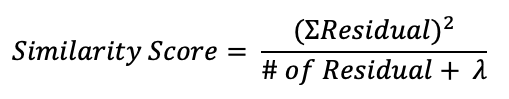
* For left child similiarity weight(or score) = 11^2/ (1+1) => 121/(1+1) = 60.5
* Similarly we will calculate similarity weight for right child:
    
        (-9+1+9+11)^2/ (4+1) = 144/5 = 28.8
* Then similarity weight of the root:
            
        (-11+-9+1+9+11)^2/ (5+1) = 1/6 = 0.16
* Now to calculate gain = left_sim_wt+ =right_sim_wt - root_sim_wt
                        = 60.5+28.8-0.16 = 89.14
* We will store this total gain in some `best_split` variable, and now we will for our second record in `Exp` column i.e 2.5. So we will split Exp column using Exp<=2.5 and Exp>2.5. Again we will calculate all three similarity weight and calculate total gain of this split. If this total gain is greater than previously stored total gain, then this will be stored as best split. Similarly we will do this for all distinct values in Exp column and one with highest total gain will be our selected split, and in variable `best_split` we will store value of total gain of that split.
* Now we will go for next categorical feature i.e Gap(we will use this below our current best split). If for node both are `Yes` or `No` then we don't need to split that as it has become leaf node. But for non leaf node, we will again calculate similarity score and total gain.
* In gap, we just have Yes and No values, so we can easily split(without checking for values like we did in `Exp`. Even Exp is also categorical feature here, but will more than 2 values that's why we checked for it.
* Let's say like this we have created a tree.

### Step 4:
* For every leaf node(when a record follows a particular tree path) then for the leaf node, output will be average of the res values in the leaf node.
* Now we will have record for which we will try to predict output, so we will add both models output i.e. Base model output + Decision Tree model output
* Suppose for a record decision tree output is --10 and base learning model output was 51
    
        => (base_mode_output + α(decision tree output)
        => 51 + 0.5* -10
        => 46K
* For every record in the above DF, it will output some value
* Similarly we can also create multiple decision trees. Like for second decision tree. Expa nd Gap will be independent features and this created output will be dependent feature.
* So generalized formula for n trees can be:

  σ((base_mode_output + α(T1) + α(T2) + .... α(Tn))
  
*  There is also one more parameter γ(gamma). Let's say if γ is 90 and after a split if we get information gain values as 80, if we do 80-90 and we get negative value, then we can post prune(cut) this part of tree. This γ is hyperparameter.